In [ ]:
!pip install nltk
!pip install textblob
!pip install textblob syllables
!pip install vaderSentiment

In [ ]:
import pandas as pd
import re
df= pd.read_csv("/content/BA_reviews.csv")

df.drop_duplicates(inplace=True)

text_to_remove = r'\bTrip Verified |\b'
text_to_remove = r'\bNot Verified  |\b'
text_to_remove ='|'
# Remove the section of text from the 'Text' column
df['reviews'] = df['reviews'].str.replace(text_to_remove, '', regex=True, flags=re.IGNORECASE)

symbol_to_remove = '✅'

# Remove the symbol from the 'reviews' column
df['reviews'] = df['reviews'].str.replace(symbol_to_remove, '')

# Remove leading and trailing spaces
df['reviews'] = df['reviews'].str.strip()

# Remove extra spaces within the text
df['reviews'] = df['reviews'].str.replace(r'\s+', ' ', regex=True)

df.head(15)

df.to_csv('cleaned_airline_reviews.csv', index=False)

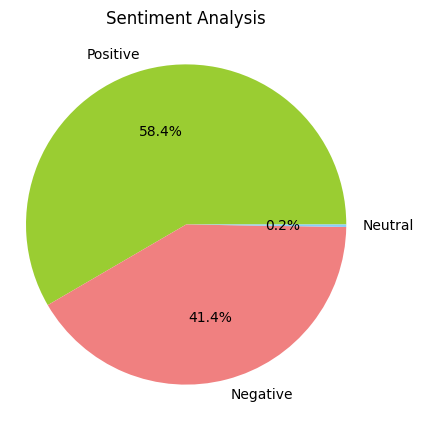

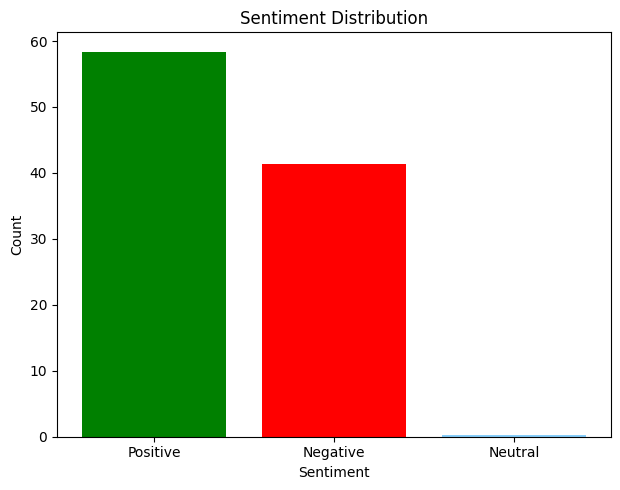

In [ ]:
#Data visuatization section

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv("/content/airline_reviews.csv")

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the 'reviews' column
df['sentiment_scores'] = df['reviews'].apply(lambda x: analyzer.polarity_scores(x))

# Split sentiment scores into separate columns
df[['neg', 'neu', 'pos', 'compound']] = df['sentiment_scores'].apply(lambda x: pd.Series(x))

# Calculate percentage of positive, negative and neutral reviews
total = df.shape[0]
positive = df[df['compound'] > 0].shape[0] / total * 100
negative = df[df['compound'] < 0].shape[0] / total * 100
neutral = df[df['compound'] == 0].shape[0] / total * 100

# Plot sentiment percentage pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.axis('equal')

# Bar chart for sentiment scores
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_counts = [positive, negative, neutral]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red', 'lightskyblue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
